In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
file_path = 'https://raw.githubusercontent.com/Bhayazeed/Dataset_submisi_dicoding_ziid/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.duplicated().sum()

In [ ]:
data.isna().sum()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

In [ ]:
Cek_balanced_data = data['Diabetes_binary'].value_counts(normalize=True)
Cek_balanced_data

In [ ]:
data = data.drop(columns=['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income', 'Age'])

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
X = data.drop(columns=['Diabetes_binary']).values
y = data['Diabetes_binary'].values

In [ ]:
data = X
labels = y

def stratified_split(data, labels, validation_split=0.2):
    labels = labels.reshape(-1)

    unique_classes, class_counts = np.unique(labels, return_counts=True)
    train_data, train_labels = [], []
    val_data, val_labels = [], []

    for class_label in unique_classes:
        class_indices = np.where(labels == class_label)[0]
        np.random.shuffle(class_indices)

        val_size = int(len(class_indices) * validation_split)

        class_val_indices = class_indices[:val_size]
        class_train_indices = class_indices[val_size:]

        train_data.append(data[class_train_indices])
        train_labels.append(labels[class_train_indices])
        val_data.append(data[class_val_indices])
        val_labels.append(labels[class_val_indices])

    X_train = np.concatenate(train_data)
    y_train = np.concatenate(train_labels)
    X_test = np.concatenate(val_data)
    y_test = np.concatenate(val_labels)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = stratified_split(data, labels, validation_split=0.2)

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8438 - loss: 0.4385 - val_accuracy: 0.8456 - val_loss: 0.4024
Epoch 2/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8464 - loss: 0.4020 - val_accuracy: 0.8471 - val_loss: 0.3992
Epoch 3/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8466 - loss: 0.3998 - val_accuracy: 0.8471 - val_loss: 0.4048
Epoch 4/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8472 - loss: 0.3986 - val_accuracy: 0.8471 - val_loss: 0.3997
Epoch 5/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8461 - loss: 0.4001 - val_accuracy: 0.8471 - val_loss: 0.3999
Epoch 6/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8476 - loss: 0.3981 - val_accuracy: 0.8471 - val_loss: 0.3993
Epoch 7/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8474 - loss: 0.3984 - val_accuracy: 0.8471 - val_loss: 0.3992
Epoch 8/20
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8478 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.1676
Test Loss: 0.3994048833847046
Test Accuracy: 0.8470606207847595


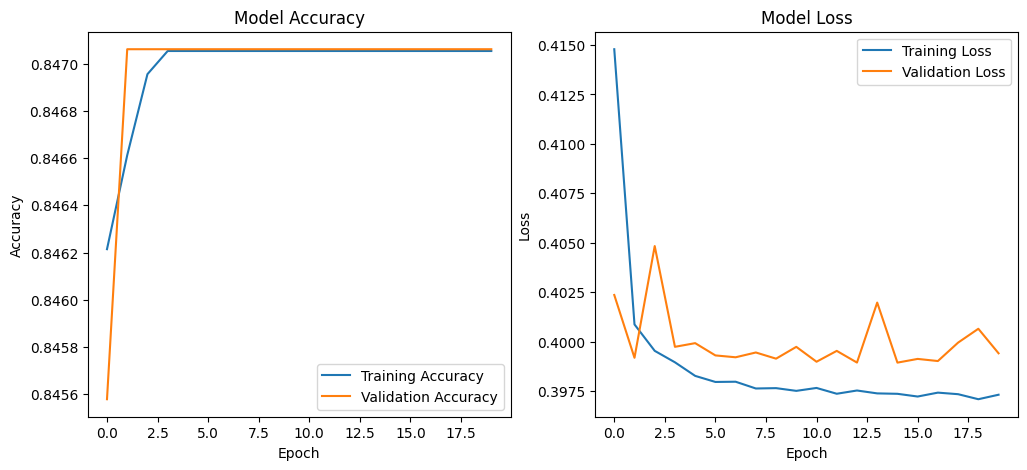

In [ ]:
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
def predict_diabetes(model):
    # Collect input from the user
    bmi = float(input("Enter BMI: "))
    smoker = float(input("Enter 1 if you are a smoker, 0 otherwise: "))
    phys_activity = float(input("Enter 1 if you engage in physical activity, 0 otherwise: "))
    veggies = float(input("Enter 1 if you eat vegetables regularly, 0 otherwise: "))
    hvy_alcohol_consump = float(input("Enter 1 if you consume heavy alcohol, 0 otherwise: "))
    sex = float(input("Enter 1 for male, 0 for female: "))

    # Create input array for model
    input_data = np.array([[bmi, smoker, phys_activity, veggies, hvy_alcohol_consump, sex]])

    # Make prediction
    prediction = model.predict(input_data)

    # Get the percentage risk
    risk_percentage = prediction[0][0] * 100

    # Interpret the prediction and print the risk percentage
    print(f"Predicted Diabetes Risk: {risk_percentage:.2f}%")
    if prediction[0] > 0.5:
        print("The model predicts that the user is at risk for diabetes.")
    else:
        print("The model predicts that the user is not at risk for diabetes.")

# Call the function to make a prediction
predict_diabetes(model)
